In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

<a href="https://colab.research.google.com/github/tomczj/ML24_25/blob/main/03_03_24/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Na początku wygenerujemy dane 2D. Aby ułatwić sobie życie, ale również sprawdzić poprawność kodu, wygerenujemy dwa różne zbiory danych, z któych poszczególe puntky będą pochodziły z rozkładu normalnego.


# Część pierwsza

##### Zbiór danych nr 1

In [2]:
#zapewnienie powtarzalności wyników
np.random.seed(0)

In [3]:
#dane z trzema klastrami mocno widocznymi
mean1_data_1 = [-1, -1]
cov1_data_1 = [[1, 0], [0, 1]]

mean2_data_1 = [3, 3]
cov2_data_1 = [[0.4, -0.3], [-0.3, 0.4]]

mean3_data_1 = [-3.5,3.5]
cov3_data_1 = [[0.3, 0.2], [0.2, 0.3]]

data_A_1 = np.random.multivariate_normal(mean1_data_1, cov1_data_1, 5000)
data_B_1 = np.random.multivariate_normal(mean2_data_1, cov2_data_1, 4000)
data_C_1 = np.random.multivariate_normal(mean3_data_1, cov3_data_1, 8000)

data_1 = np.vstack([data_A_1, data_B_1, data_C_1])

#### Zbiór danych nr 2

In [4]:
#dane z czterema klastrami słabiej widocznymi
mean1_data_2 = [0,0]
mean2_data_2 = [-3,2]
mean3_data_2 = [-2,-3]
mean4_data_2 = [3,-3]

cov1_data_2 = [[1,0],[0,1]]
cov2_data_2 = [[0.8, 0.5],[0.5, 0.8]]
cov3_data_2 = [[1, -0.3], [-0.3, 1]]
cov4_data_2 = [[1, -0.3], [-0.3, 1]]

data_A_2 = np.random.multivariate_normal(mean1_data_2, cov1_data_2, 4000)
data_B_2 = np.random.multivariate_normal(mean2_data_2, cov2_data_2, 1950)
data_C_2 = np.random.multivariate_normal(mean3_data_2, cov3_data_2, 2900)
data_D_2 = np.random.multivariate_normal(mean4_data_2, cov4_data_2, 2000)
data_2 = np.vstack([data_A_2, data_B_2, data_C_2, data_D_2])


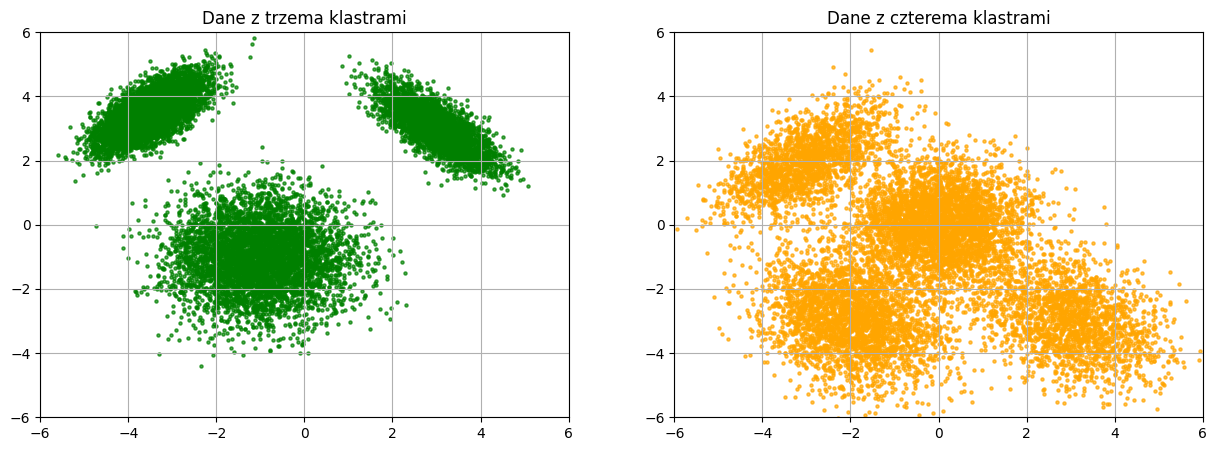

In [5]:
#wykresy danych wygenerowanych na potrzeby zadania


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(data_1[:, 0], data_1[:, 1], s=5, c = "green", alpha = 0.7)
axs[0].grid()
axs[0].set_xlim([-6,6])
axs[0].set_ylim([-6,6])
axs[0].set_title('Dane z trzema klastrami')

axs[1].scatter(data_2[:, 0], data_2[:, 1], s=5, c = 'orange', alpha = 0.7)
axs[1].grid()
axs[1].set_xlim([-6,6])
axs[1].set_ylim([-6,6])
axs[1].set_title('Dane z czterema klastrami')

plt.show()

### Teraz będziemy szcaować odpowiednie modele dla poszczególnych danych

In [6]:
model_for_data_1 = GaussianMixture(n_components = 3, covariance_type = "full")
model_for_data_2 = GaussianMixture(n_components = 4, covariance_type = "full")

model_for_data_1.fit(data_1)
model_for_data_2.fit(data_2)

labels_for_model_1 = model_for_data_1.predict(data_1)
labels_for_model_2 = model_for_data_2.predict(data_2)


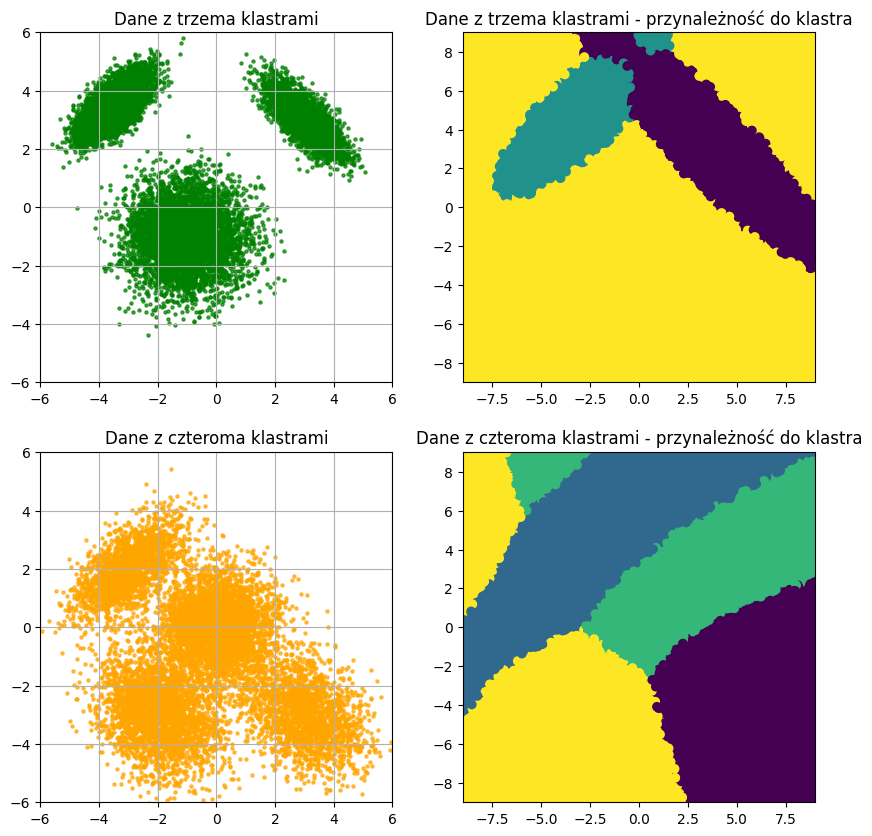

In [7]:
square = np.random.uniform(-10, 10, (100000, 2))
boundary_1 = model_for_data_1.predict(square)
boundary_2 = model_for_data_2.predict(square)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(data_1[:, 0], data_1[:, 1], s=5, c = "green", alpha = 0.7)
axs[0,0].grid()
axs[0,0].set_xlim([-6,6])
axs[0,0].set_ylim([-6,6])
axs[0,0].set_title('Dane z trzema klastrami')

axs[0,1].set_title('Dane z trzema klastrami - przynależność do klastra')
axs[0,1].scatter(square[:,0],square[:,1], c = boundary_1, alpha = 1)
axs[0,1].set_xlim([-9,9])
axs[0,1].set_ylim([-9,9])

axs[1,0].scatter(data_2[:, 0], data_2[:, 1], s=5, c = "orange", alpha = 0.7)
axs[1,0].grid()
axs[1,0].set_xlim([-6,6])
axs[1,0].set_ylim([-6,6])
axs[1,0].set_title('Dane z czteroma klastrami')

axs[1,1].set_title('Dane z czteroma klastrami - przynależność do klastra')
axs[1,1].scatter(square[:,0],square[:,1], c = boundary_2, alpha = 1)
axs[1,1].set_xlim([-9,9])
axs[1,1].set_ylim([-9,9])

plt.show()


#### Powyżej możemy obserwować wykresy przynależności poszczególnych punktów do odpowiednich klastrów. Punkt "przynależy" do jakiegoś klastra, jeśli prawdopodobieństwo tego zawierania było największe w porównaniu z innymi klastrami. 

## Odpowiedź na pytanie 1

Jak widać na powyższym wykresie, dosyć łatwo możemy zaklasyfikować odpowiednie punkty do poszczególnych klastrów. Można jednak zwrócić uwagę na nieregurlaności dla obu zbiorów danych (brak "prostych i czystych" granic między obszarami). Ma to związek z wybraną metodą, czyli braniem punktów z rozkładu jednostajnego na kwadratach. 

Dla zbioru danych numer 1 można zaobserwować dwie chmury punktów, które kształtem przypominają elipsoidy, co pokrywa się z tym z jakiego rozkładu pochodzą punkty (skorelowane współrzędne). W takim razie (w przypadku rozkładu normalnego) prawdopodobieństwo przynależności poszczególnych punktów będzie większe wzdłuż wielkiej osi poszczególnych elipsoid, co jest widoczne na mapie określającej przynależność do klastrów. Żółty region okala pozostałe obszary, ponieważ punkty w tym klastrze pochodzą z rozkładu normalnego o nieskorelowanych współrzędnych, a co za tym idzie kształ klastra przypomina bardziej koło.

Analogiczny opis stosuje się również do zbioru danych numer 2.

# Druga część

#### Na początku zdefiniujemy odpowiednie metryki, które będą służyły do identyfikacji ilości kalstrów

In [8]:
#silhouette score

def silhouette_score(X, labels):
    n = len(X)
    a = np.zeros(n)
    b = np.zeros(n)
    unique_labels = np.unique(labels)
    
    if len(unique_labels) == 1:
        return 0

    for i in range(n):
        same_cluster_mask = (labels == labels[i])
        same_cluster_points = X[same_cluster_mask]
        a[i] = np.mean(np.linalg.norm(same_cluster_points - X[i], axis=1))
        b_values = [
            np.mean(np.linalg.norm(X[labels == j] - X[i], axis=1))
            for j in unique_labels if j != labels[i]
        ]
        b[i] = np.min(b_values)

    return np.mean((b - a) / (np.maximum(a, b))) 


#inertia

def inertia_sc(X, labels):
    inertia = 0.0
    unique_labels = np.unique(labels)
    
    for cluster in unique_labels:
        cluster_points = X[labels == cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        inertia += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)

    return inertia


In [9]:
#posłużą nam do określenia ilości klastrów
num_clusters = [1, 2, 3, 4, 5, 6]

inertia = np.zeros((2, len(num_clusters)))
elbo_score = np.zeros((2, len(num_clusters)))
silh_score =  np.zeros((2, len(num_clusters)))

#szacujemy różne modele i będziemy porównywać dla nich poszczególne wartości metryk
for n in num_clusters:
    model_1 = GaussianMixture(n_components = n, covariance_type = "full")
    model_2 = GaussianMixture(n_components = n, covariance_type = "full")

    model_1.fit(data_1)
    model_2.fit(data_2)

    labels_1 = model_1.predict(data_1)
    labels_2 = model_2.predict(data_2)

    inertia[0, n - 1 ] = inertia_sc(data_1, labels_1)
    inertia[1, n - 1 ] = inertia_sc(data_2, labels_2)

    elbo_score[0, n - 1 ] = model_1.lower_bound_
    elbo_score[1, n - 1 ] = model_2.lower_bound_

    silh_score[0, n - 1 ] = silhouette_score(data_1, labels_1)
    silh_score[1, n - 1 ] = silhouette_score(data_2, labels_2)



#### Teraz będziemy na wykresie porównywać poszczególne wartości

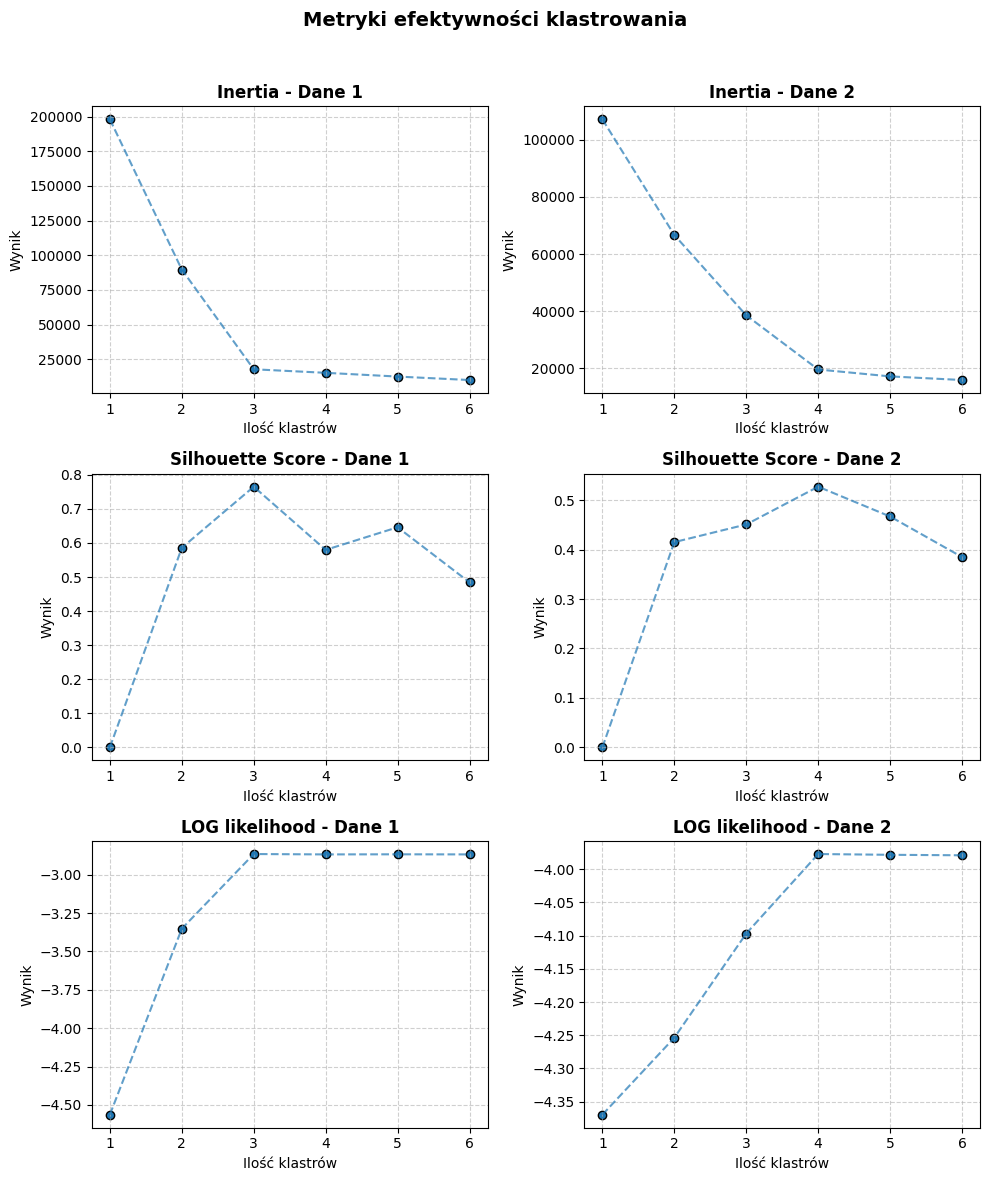

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

titles = [
    "Inertia - Dane 1", "Inertia - Dane 2",
    "Silhouette Score - Dane 1", "Silhouette Score - Dane 2",
    "LOG likelihood - Dane 1", "LOG likelihood - Dane 2"
]

data = [inertia[0, :], inertia[1, :], 
        silh_score[0, :], silh_score[1, :], 
        elbo_score[0, :], elbo_score[1, :]]

for ax, title, values in zip(axs.flat, titles, data):
    ax.scatter(num_clusters, values, marker='o', color='tab:blue', edgecolors='black')
    ax.plot(num_clusters, values, linestyle='--', color='tab:blue', alpha=0.7)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("Ilość klastrów", fontsize=10)
    ax.set_ylabel("Wynik", fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.6)

plt.suptitle("Metryki efektywności klastrowania", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Opdowiedź na pytanie 2

Bazując na wcześniej wygenerowanych zbiorach danych, znamy liczbę klastrów. Natomiast w przypadku, gdybyśmy nie znali odpowiedniej wartości, możemy posłużyć się odpowiednimi metrykami. W moim podejściu wykorzystałem metryki: Silhouette oraz Inertia, aby zwizualizować, jak zmieniają się ich wartości przy zmianie liczby klastrów.
Ponadto wykorzystałem log Likelihood.

W przypadku log Likelihood oraz Silhouette chcemy znaleźć liczbę klastrów, która daje najwyższe wartości. Metryka Silhouette informuje nas o tym, czy klastry są dobrze odseparowane (wartości bliskie 1) lub czy się pokrywają (bliskie 0 lub ujemne). W przypadku zbioru danych numer 1, gdzie klastry były dobrze odseparowane od początku, widać, że najwyższa wartość tej metryki występuje przy trzech klastrach (i jest bliska 1) – co zgadza się z tym, jak generowaliśmy dane. Natomiast w przypadku zbioru danych numer 2, gdzie klastry nachodziły na siebie, wartość Silhouette jest bardziej oddalona od 1, ale nadal najwyższa w przypadku czterech klastrów, co pokrywa się z tym, jak dane zostały wygenerowane.

Analogicznie, wartość log Likelihood pozostaje w miarę stała od momentu zastosowania trzech klastrów (dla danych 1) lub czterech klastrów (dla danych 2).

W przypadku mierzenia Inertii szukamy najmniejszej wartości. Na zadanym przedziale można zauważyć, że dla obu zbiorów danych funkcja zależna od liczby klastrów jest malejąca – im więcej klastrów, tym lepiej. Jednak zarówno dla danych 1, jak i danych 2, jej wykres stabilizuje się coraz bardziej, im bardziej oddalamy się od spodziewanej liczby klastrów (3 dla danych 1 i 4 dla danych 2).

Podsumowując, szukając odpowiedniej liczby klastrów, możemy posłużyć się różnymi metrykami (jak w powyższym przykładzie). Idea opiera się na oszacowaniu wielu modeli dla różnych wartości klastrów oraz analizie metryk efektywności klasteryzacji w celu określenia optymalnej liczby klastrów.